# Classification example
Using synthetic data which is easy to visualise and manually interrogate is an easy way to get a basic intuition for some simple machine-learning algorithms. To demonstrate classificationm,  we look at a synthetic dataset that can be created by scikit-learn, which contains several generated blobs dataset that may overlap.

## Classifying blobs
Scikit learn classification on test data based on https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/


In [1]:
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from pandas import DataFrame
import numpy

In [2]:
import sklearn
import sklearn.neighbors
import sklearn.preprocessing
import sklearn.ensemble
import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics
import sklearn.tree
import sklearn.svm
from sklearn.datasets import make_blobs

### Generating Data

For this example, we will use the make blobs function supplied by scikit-learn.

Documentation
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [3]:
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
colors = {0: 'red', 1: 'blue', 2: 'green'}
num_blobs = 3
num_features = 2
cluster_std = 3.0
grid_size = 25

In [4]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=400, centers=num_blobs, n_features=num_features, cluster_std=cluster_std)

We're also creating a grid of point, which will be used to show how the various classifiers divide up the feature space

In [5]:
val_ranges=[(min(X[:,ix1]), max(X[:,ix1])) for ix1 in range(0,X.shape[1])]
grid_x, grid_y = numpy.meshgrid( numpy.arange(val_ranges[0][0], val_ranges[0][1], (val_ranges[0][1] - val_ranges[0][0]) / grid_size),
               numpy.arange(val_ranges[1][0], val_ranges[1][1], (val_ranges[1][1] - val_ranges[1][0]) / grid_size))
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()
X_grid = numpy.concatenate([grid_x.reshape(grid_x.shape[0],1), grid_y.reshape(grid_y.shape[0],1)], axis=1)

### Data exploration 
The first step in a machine learning problem, is to try to understand the data you are working with. In this case our data is 2 dimensional so we can easily visualise it. In other cases more sophisticated tools may be needed.

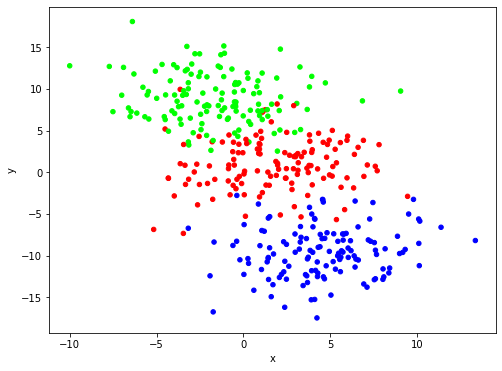

In [6]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))

fig1 = pyplot.figure('blobs', figsize=(8,6))
ax1 = fig1.add_subplot(111)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',cmap=cmap_bold,colorbar=False)


### Data preparation

Before we apply machine learning algorithms to the data, we need to prepare it so it is in a suitable form. When dealing with labelled data, we also divide up the data into 2 parts, called the train and test sets. We train our algorithm on the training set. We then measure the performance on the test set, which in unseen by the algorithm. This tells us how well our data fit generalises to the whole problem.

In [7]:
(X_train, X_test,
 y_train, y_test) = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)

We also need to make some numerical transformations. To give all features equal importance (which is a standard starting assumption), we want the features to have zero mean and standard deviation of 1, so as not to skew the magnitude of distance metrics in feature space.

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
df_train = DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1], label=y_train))
df_train_scale = DataFrame(dict(x=X_train_scale[:, 0], y=X_train_scale[:, 1], label=y_train))
df_test = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_test))
df_test_scale = DataFrame(dict(x=X_test_scale[:, 0], y=X_test_scale[:, 1], label=y_test))

We see how this does not change the shape of the data by plotting after scaling.

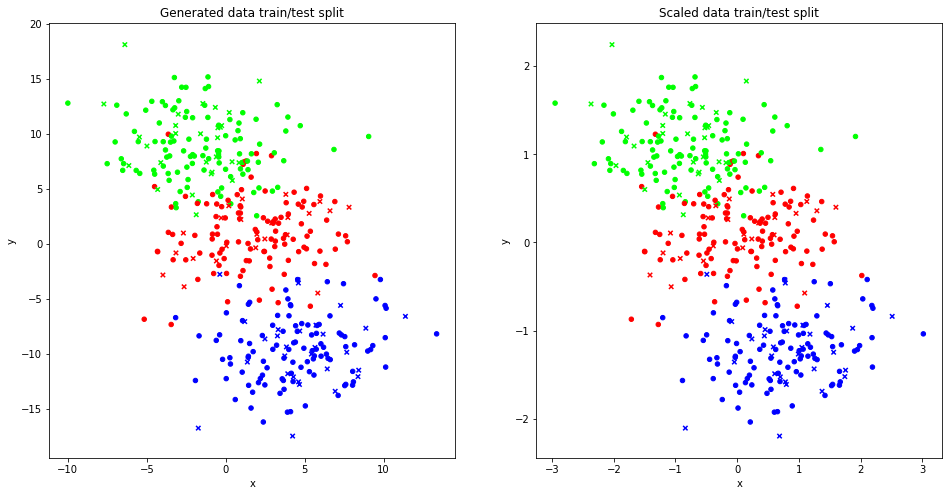

In [9]:
fig1 = pyplot.figure('blob_splits', figsize=(16,8))
ax1 = fig1.add_subplot(121,title='Generated data train/test split')
df_train.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
df_test.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False, marker='x')
ax1 = fig1.add_subplot(122, title='Scaled data train/test split')
df_train_scale.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
_= df_test_scale.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False, marker='x')

### Training and evaluating a classifier
Now that we have prepared the data, we can train a classifier algorithm. We will apply some common classifiers available in scikit-learn.

* Support Vector Classifier https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
* k-nearest neighbours classifier https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
* random forest classifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* neural network classifier https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Further reading
* Supervised learning https://scikit-learn.org/stable/supervised_learning.html 

In [10]:
def do_result_plot(train_data, test_data, result_data, grid_data, algorithm_name):
    """
    Helper function to make the plotting of classification results easier and less repetitive.
    """
    fig_result = pyplot.figure(f'train/test/result {algorithm_name}', figsize=(16,16))
    ax_result_1 = fig_result.add_subplot(221, title=f'train and test labels {algorithm_name}')
    _ = train_data.plot(ax=ax_result_1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
    _ = test_data.plot(ax=ax_result_1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold,marker='x', colorbar=False)
    ax_result_2 = fig_result.add_subplot(222, title=f'train and result labels {algorithm_name}')#
    _ = train_data.plot(ax=ax_result_2, kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
    _ = result_data.plot(ax=ax_result_2,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold,marker='x', colorbar=False)
    ax_result_3 = fig_result.add_subplot(223, title=f'test points with incorrect result labels {algorithm_name}')#
    _ = test_data[test_data.label == result_data.label].plot(ax=ax_result_3,kind='scatter',x='x',y='y',c='grey',colorbar=False,marker='x',vmin=0,vmax=2)
    _ = test_data[test_data.label != result_data.label].plot(ax=ax_result_3,kind='scatter',x='x',y='y',c='label',cmap=cmap_bold,colorbar=False,marker='x',vmin=0,vmax=2)    
    ax_result_4 = fig_result.add_subplot(224, title=f'result space grid {algorithm_name}')#
    grid_data.plot(ax=ax_result_4,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)

This example shows us the basic interface for the elements descruibed earlier. Each classifier (or regressor) has 2 key functions: fit and predict. The fit function trains the algorithm for this dataset. We only pass it therefore the data points in the training set. The second key function, predict, uses the classifier to predict a target value for point in feature space supplied. We run predict for both train and test data separately. The result for the training set tells us how well the algorithm is able to predict values in the set it has seen. The result on the test set tells us how well this fit generalises to other data point in the same problem space.

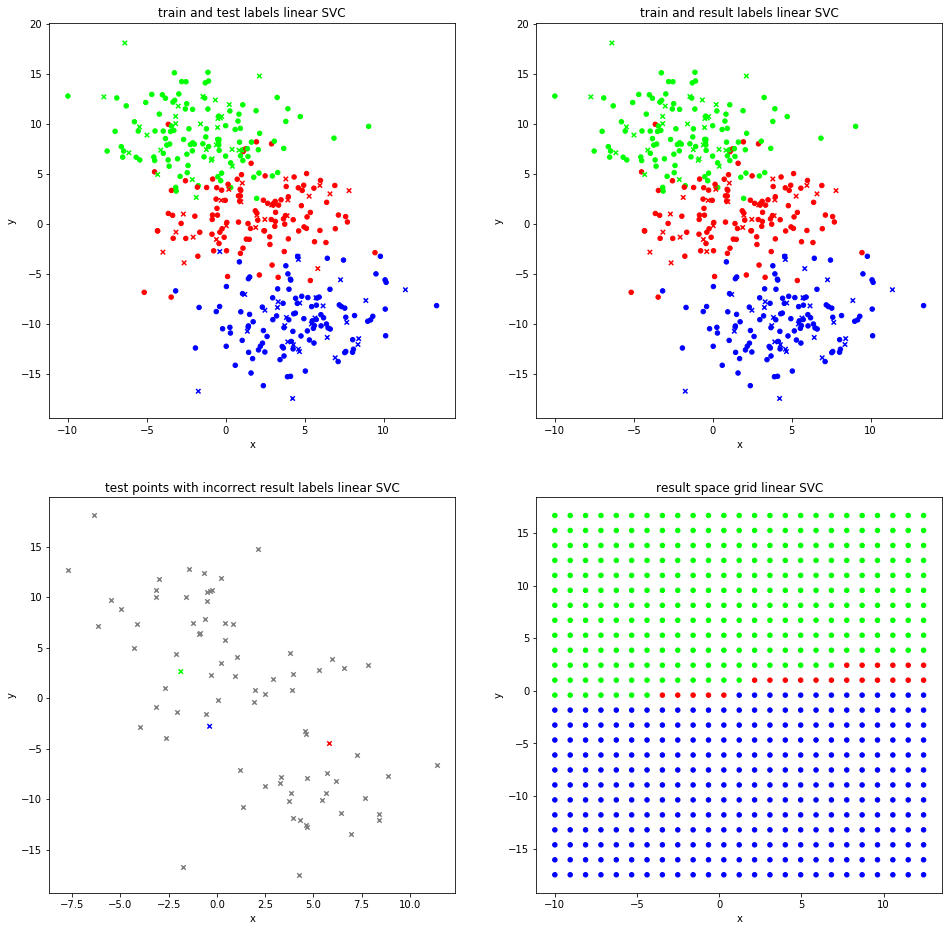

In [11]:
clf_lin_svc = sklearn.svm.LinearSVC(max_iter=5000,tol=1e-2)
clf_lin_svc.fit(X_train_scale, y_train)
y_res_train_svc = clf_lin_svc.predict(X_train_scale)
df_res_train_svc = DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1], label=y_res_train_svc))
y_res_test_svc = clf_lin_svc.predict(X_test_scale)
df_res_test_svc = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_res_test_svc))
grid_result_svc = clf_lin_svc.predict(X_grid)
df_grid_svc = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_svc))
do_result_plot(df_train, df_test, df_res_test_svc, df_grid_svc, 'linear SVC')

In [12]:
y_res_train_svc.shape

(320,)

### Metrics 
Because our feature space is 2D, we can easily visualise the predictions of the classifier and evaluate the results in that way. In  general our feature space will have tens, hundreds or thosands of dimensions, making this approach impossible. It is also unreliable, based on our judgement, making it difficult to compare results. To evaluate the classifier, we need a standard quantative measure of performance across algorithms. A common measure for classification is the f1-score, which combine measures of precision and recall.

Documentation:
* F1-score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* Recall https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
* Precision  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

Further reading:
* Metrics for model evaluation https://scikit-learn.org/stable/modules/model_evaluation.html
* Description of precision and recall https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

In [29]:
metrics_list = []

In [14]:
sklearn.metrics.f1_score(y_train, y_res_train_svc,average=None)

array([0.85572139, 0.96296296, 0.9058296 ])

In [30]:
f1_svc = sklearn.metrics.f1_score(y_test, y_res_test_svc,average=None)
metrics_list += [{'classifier': 'SVC', 'class1': f1_svc[0], 'class2': f1_svc[1], 'class3': f1_svc[2]}]

In [16]:
sklearn.metrics.f1_score(y_test, y_res_test_svc,average=None)

array([0.93617021, 0.96551724, 0.98181818])

Following the same pattern of code, we can try other classifiers. Here we try a nearest neighbours approach, which looks at the n closest data point in feature space and selects a label based on the labels of those points.

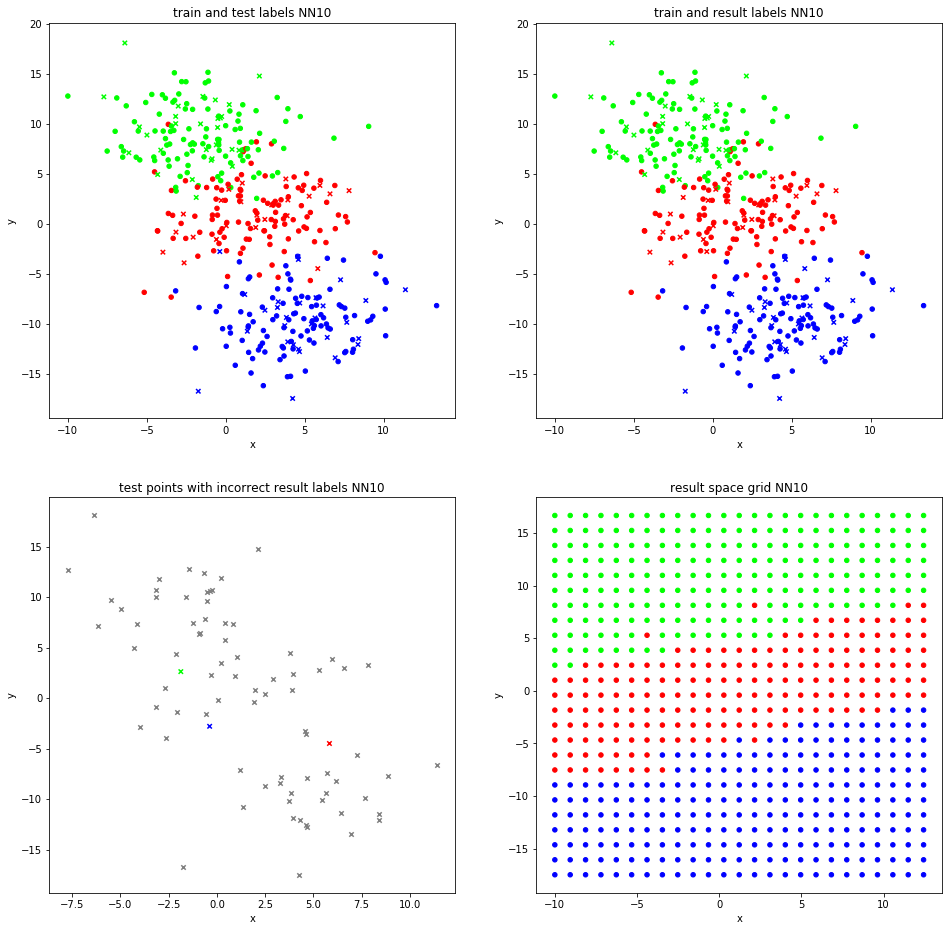

In [17]:
n_neighbours = 10
weights = 'distance'
clf_nn10 = sklearn.neighbors.KNeighborsClassifier(n_neighbours, weights=weights)
clf_nn10.fit(X_train, y_train)
y_result_nn10 = clf_nn10.predict(X_test)
df_result_nn10 = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_result_nn10))
grid_result_nn10 = clf_nn10.predict(X_grid)
df_grid_nn10 = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_nn10))
do_result_plot(df_train, df_test, df_result_nn10, df_grid_nn10, 'NN10')

The number of neighbours is something that we have to choose as it is now part of the training process. Additional parameters for the algorithm that are not chosen by training are called hyper parameters. One can try multiple different values of hyperparameters to find which are best suited to the current problem. This is called hyperparameter tuning.

Here we try a different value of number of neighbours parameters. We can see that the higher the value of this hyperparameter, the greater the "smoothing" effect is on how the parameter space is divided between classes.

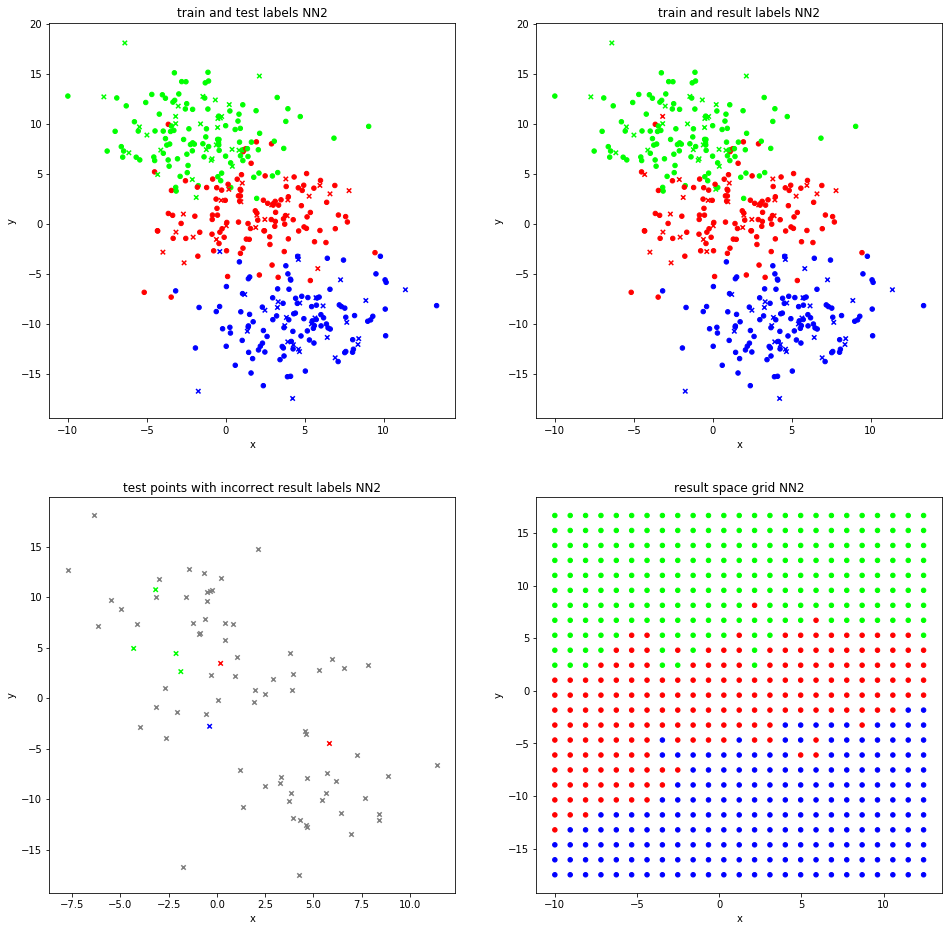

In [18]:
clf_nn2 = sklearn.neighbors.KNeighborsClassifier(2, weights=weights)
clf_nn2.fit(X_train, y_train)
y_result_nn2 = clf_nn2.predict(X_test)
df_result_nn2 = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_result_nn2))
grid_result_nn2 = clf_nn2.predict(X_grid)
df_grid_nn2 = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_nn2))
do_result_plot(df_train, df_test, df_result_nn2, df_grid_nn2, 'NN2')

In [19]:
sklearn.metrics.f1_score(y_test, y_result_nn2,average=None)

array([0.85714286, 0.96551724, 0.90566038])

In [31]:
f1_nn2 = sklearn.metrics.f1_score(y_test, y_result_nn2,average=None)
metrics_list += [{'classifier': 'knn2', 'class1': f1_nn2[0], 'class2': f1_nn2[1], 'class3': f1_nn2[2]}]

A common type of classifier is a decision tree, where a decision graph is created with different thresholds for choosing between different branches selected by the training process.

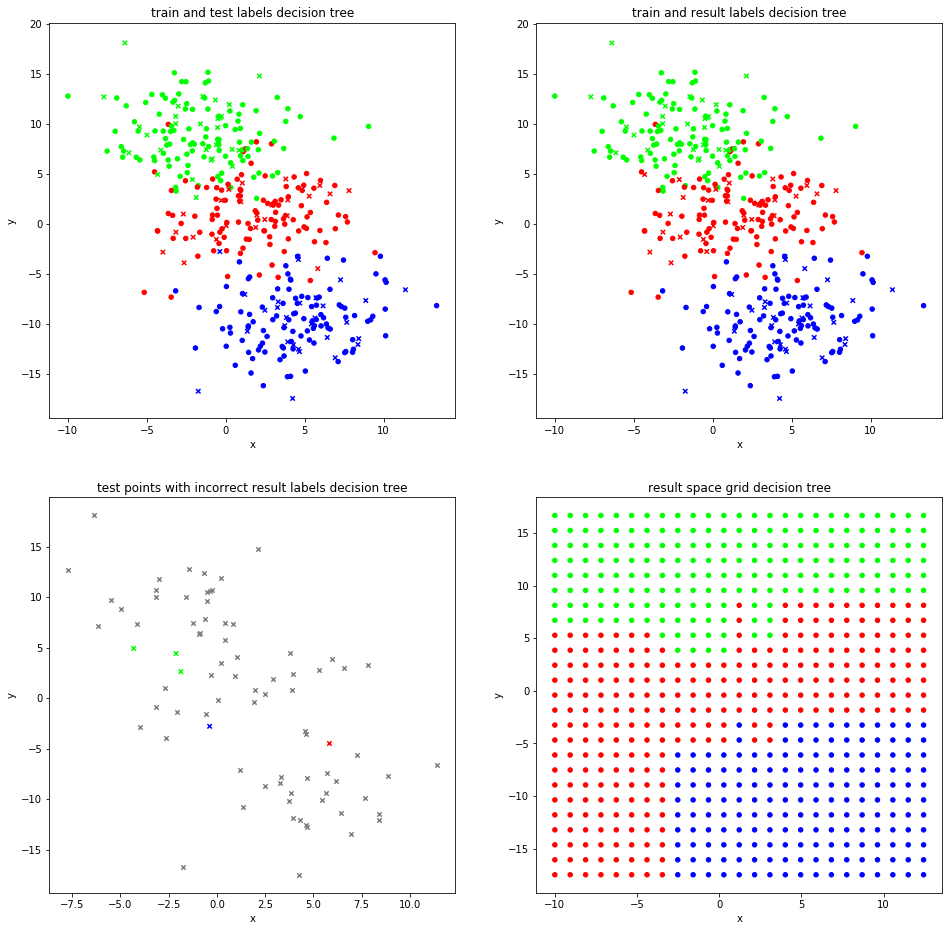

In [21]:
clf_dt = sklearn.tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_result_dt = clf_dt.predict(X_test)
df_result_dt = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_result_dt))
grid_result_dt = clf_dt.predict(X_grid)
df_grid_dt = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_dt))
do_result_plot(df_train, df_test, df_result_dt, df_grid_dt, 'decision tree')

In [22]:
sklearn.metrics.f1_score(y_test, y_result_dt,average=None)

array([0.89795918, 0.96551724, 0.94339623])

In [32]:
f1_dt = sklearn.metrics.f1_score(y_test, y_result_dt,average=None)
metrics_list += [{'classifier': 'dtree', 'class1': f1_dt[0], 'class2': f1_dt[1], 'class3': f1_dt[2]}]

Lastly we use a neural network. This is probably overkill for this problem, but does demonstrate how we can deploy such a powerful algorithm using the same simple fit/predict interface.

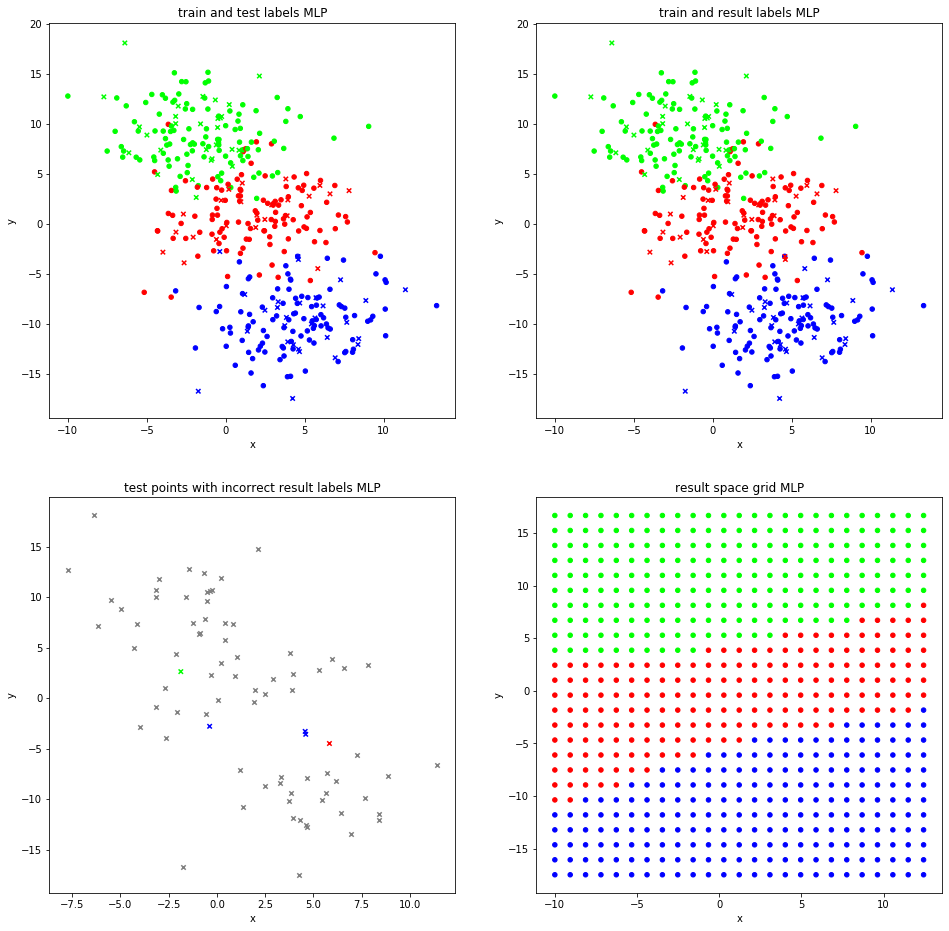

In [24]:
param_mlp = {'alpha': 1e-5,
        'hidden_layer_sizes': (5, 3),
        'random_state': 1,
            'solver':'lbfgs',
            'max_iter': 300}
clf_mlp = sklearn.neural_network.MLPClassifier(**param_mlp)
clf_mlp.fit(X_train_scale, y_train)
y_result_mlp = clf_mlp.predict(X_test_scale)
df_result_mlp = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_result_mlp))
grid_result_mlp = clf_mlp.predict(scaler.transform(X_grid))
df_grid_mlp = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_mlp))
do_result_plot(df_train, df_test, df_result_mlp, df_grid_mlp, 'MLP')

/root/my-conda-envs/ds_cop_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


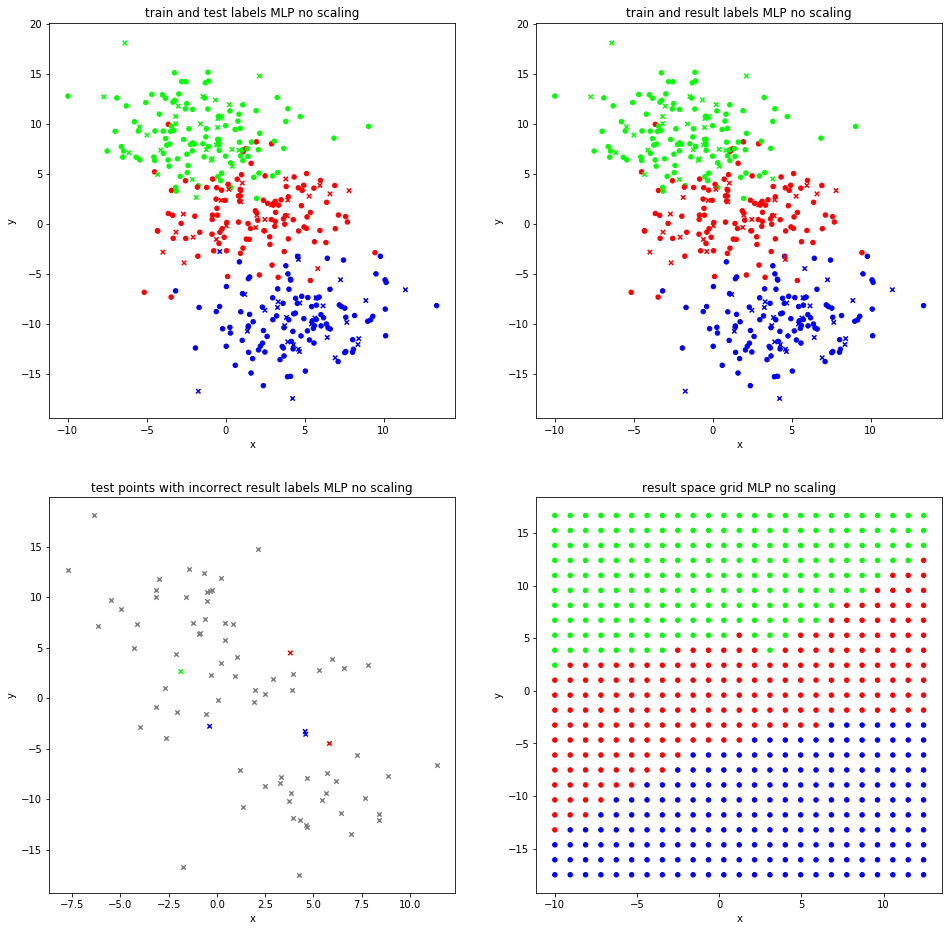

In [25]:
clf_mlp_noscale = sklearn.neural_network.MLPClassifier(**param_mlp)
clf_mlp.fit(X_train, y_train)
y_result_mlp = clf_mlp.predict(X_test)
df_result_mlp = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_result_mlp))
grid_result_mlp = clf_mlp.predict(X_grid)
df_grid_mlp = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_mlp))
do_result_plot(df_train, df_test, df_result_mlp, df_grid_mlp, 'MLP no scaling')

In [26]:
sklearn.metrics.f1_score(y_test, y_result_mlp,average=None)

array([0.875     , 0.92857143, 0.96428571])

In [33]:
f1_mlp = sklearn.metrics.f1_score(y_test, y_result_mlp,average=None)
metrics_list += [{'classifier': 'mlp', 'class1': f1_mlp[0], 'class2': f1_mlp[1], 'class3': f1_mlp[2]}]

Here we can compare the metrics from each of the classifiers. For this simple problem the support vector classifier and KNN-2 seem to have performed best.

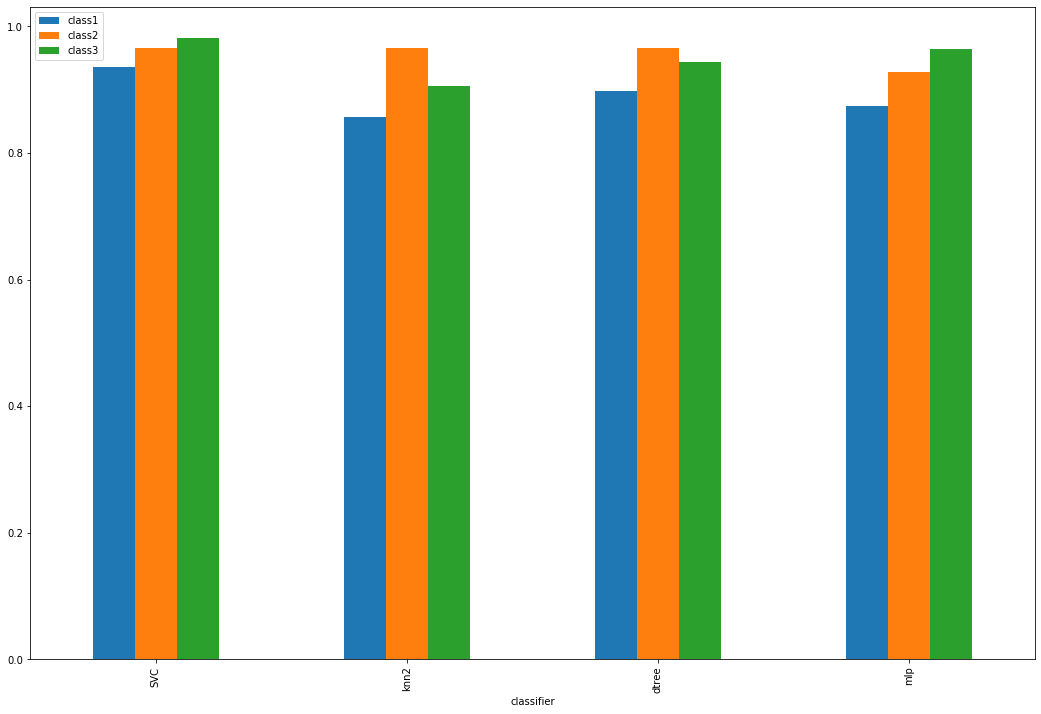

In [34]:
_ = DataFrame.from_records(metrics_list).plot.bar(x='classifier',y=['class1','class2','class3'],figsize=(18,12))